# 2. PCA: Food Consumption in European Countries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


import scipy
from networkx.algorithms.threshold import eigenvalues, eigenvectors
from sklearn.preprocessing import StandardScaler


In [2]:
# import the dataset
df = pd.read_csv(r'./data/food-consumption.csv', index_col = 0)
df

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
Country,,,,,,,,,,,,,,,,,,,,
Germany,90,49,88,19,57,51,19,21,27,21,81,75,44,71,22,91,85,74,30,26
Italy,82,10,60,2,55,41,3,2,4,2,67,71,9,46,80,66,24,94,5,18
France,88,42,63,4,76,53,11,23,11,5,87,84,40,45,88,94,47,36,57,3
Holland,96,62,98,32,62,67,43,7,14,14,83,89,61,81,15,31,97,13,53,15
Belgium,94,38,48,11,74,37,23,9,13,12,76,76,42,57,29,84,80,83,20,5
Luxembourg,97,61,86,28,79,73,12,7,26,23,85,94,83,20,91,94,94,84,31,24
England,27,86,99,22,91,55,76,17,20,24,76,68,89,91,11,95,94,57,11,28
Portugal,72,26,77,2,22,34,1,5,20,3,22,51,8,16,89,65,78,92,6,9
Austria,55,31,61,15,29,33,1,5,15,11,49,42,14,41,51,51,72,28,13,11


In [3]:
# let's standardize the data. Note: will use SVD later (non-square matrix)
df_centered = df - df.mean(axis=0)

df_centered

# scaler = StandardScaler()

# df_scaled = scaler.fit_transform(df)

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
Country,,,,,,,,,,,,,,,,,,,,
Germany,11.4375,9.75,9.5,1.0,-3.6875,2.0,0.6875,8.25,5.125,5.125,14.1875,4.5,2.0625,15.8125,-20.3125,15.1875,15.875,19.8125,9.4375,-1.75
Italy,3.4375,-29.25,-18.5,-16.0,-5.6875,-8.0,-15.3125,-10.75,-17.875,-13.875,0.1875,0.5,-32.9375,-9.1875,37.6875,-9.8125,-45.125,39.8125,-15.5625,-9.75
France,9.4375,2.75,-15.5,-14.0,15.3125,4.0,-7.3125,10.25,-10.875,-10.875,20.1875,13.5,-1.9375,-10.1875,45.6875,18.1875,-22.125,-18.1875,36.4375,-24.75
Holland,17.4375,22.75,19.5,14.0,1.3125,18.0,24.6875,-5.75,-7.875,-1.875,16.1875,18.5,19.0625,25.8125,-27.3125,-44.8125,27.875,-41.1875,32.4375,-12.75
Belgium,15.4375,-1.25,-30.5,-7.0,13.3125,-12.0,4.6875,-3.75,-8.875,-3.875,9.1875,5.5,0.0625,1.8125,-13.3125,8.1875,10.875,28.8125,-0.5625,-22.75
Luxembourg,18.4375,21.75,7.5,10.0,18.3125,24.0,-6.3125,-5.75,4.125,7.125,18.1875,23.5,41.0625,-35.1875,48.6875,18.1875,24.875,29.8125,10.4375,-3.75
England,-51.5625,46.75,20.5,4.0,30.3125,6.0,57.6875,4.25,-1.875,8.125,9.1875,-2.5,47.0625,35.8125,-31.3125,19.1875,24.875,2.8125,-9.5625,0.25
Portugal,-6.5625,-13.25,-1.5,-16.0,-38.6875,-15.0,-17.3125,-7.75,-1.875,-12.875,-44.8125,-19.5,-33.9375,-39.1875,46.6875,-10.8125,8.875,37.8125,-14.5625,-18.75
Austria,-23.5625,-8.25,-17.5,-3.0,-31.6875,-16.0,-17.3125,-7.75,-6.875,-4.875,-17.8125,-28.5,-27.9375,-14.1875,8.6875,-24.8125,2.875,-26.1875,-7.5625,-16.75


In [4]:
df['Real coffee'].mean()

np.float64(78.5625)

In [5]:
# perform SVD on X, then get the first two principle components
U, Sigma, VT = np.linalg.svd(df_centered, full_matrices = True)

U = U.real
Sigma = Sigma.real
# VT = VT.real
# get the first two principal components; remember sigma[0] = sqrt(lambda[0])
projected_data = np.dot(U[:, :2], np.diag(Sigma[:2]))


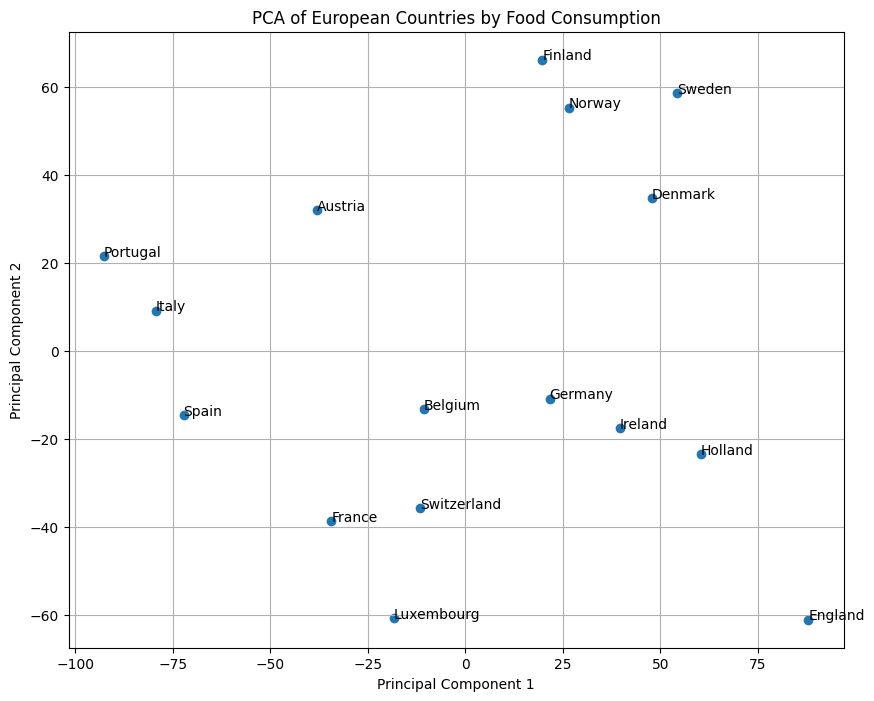

In [6]:
# project and plot

projected_df = pd.DataFrame(projected_data, index=df_centered.index, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 8))
plt.scatter(projected_df['PC1'], projected_df['PC2'])

for country in projected_df.index:
    plt.text(projected_df.loc[country, 'PC1'], projected_df.loc[country, 'PC2'], country)

plt.title('PCA of European Countries by Food Consumption')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## 2.2

In [7]:
# get the matrix in the right format
df = pd.read_csv(r'./data/food-consumption.csv')

new_columns = df['Country']

df_rest = df.drop(columns=['Country'])
df_T = df_rest.transpose()

df_T.columns = new_columns.values

# df_T = df_T.reset_index(drop=True)

df_T.index.name = 'Food'

df_T_centered = df_T - df_T.mean(axis=0)


# get SVD
U_T, Sigma_T, VT_T = np.linalg.svd(df_T_centered, full_matrices=True)

projected_df_T = np.dot(U_T[:, :2], np.diag(Sigma_T[:2]))
projected_df_T = pd.DataFrame(projected_df_T, index=df_T_centered.index, columns=['PC1', 'PC2'])

In [8]:
df_T_centered

,Germany,Italy,France,Holland,Belgium,Luxembourg,England,Portugal,Austria,Switzerland,Sweden,Denmark,Norway,Finland,Spain,Ireland
Food,,,,,,,,,,,,,,,,
Real coffee,37.95,44.95,40.15,44.35,48.45,37.4,-29.85,37.1,23.6,22.75,45.35,46.25,48.9,56.7,28.8,-9.45
Instant coffee,-3.05,-27.05,-5.85,10.35,-7.55,1.4,29.15,-8.9,-0.4,21.75,-38.65,-32.75,-26.1,-29.3,-1.2,12.55
Tea,35.95,22.95,15.15,46.35,2.45,26.4,42.15,42.1,29.6,34.75,41.35,42.25,39.9,42.7,-1.2,59.55
Sweetener,-33.05,-35.05,-43.85,-19.65,-34.55,-31.6,-34.85,-32.9,-16.4,-25.25,-20.65,-14.75,-30.1,-21.3,-23.2,-28.45
Biscuits,4.95,17.95,28.15,10.35,28.45,19.4,34.15,-12.9,-2.4,-19.25,9.35,16.25,18.9,22.7,20.8,40.55
Powder soup,-1.05,3.95,5.15,15.35,-8.55,13.4,-1.85,-0.9,1.6,18.75,-8.65,-17.75,7.9,-14.3,1.8,35.55
Tin soup,-33.05,-34.05,-36.85,-8.65,-22.55,-47.6,19.15,-33.9,-30.4,-40.25,-8.65,-32.75,-39.1,-31.3,-39.2,-21.45
Potatoes,-31.05,-35.05,-24.85,-44.65,-36.55,-52.6,-39.85,-29.9,-26.4,-33.25,-12.65,-38.75,-26.1,-33.3,-27.2,-37.45
Frozen fish,-25.05,-33.05,-36.85,-37.65,-32.55,-33.6,-36.85,-14.9,-16.4,-31.25,2.35,1.25,-13.1,-23.3,-18.2,-34.45


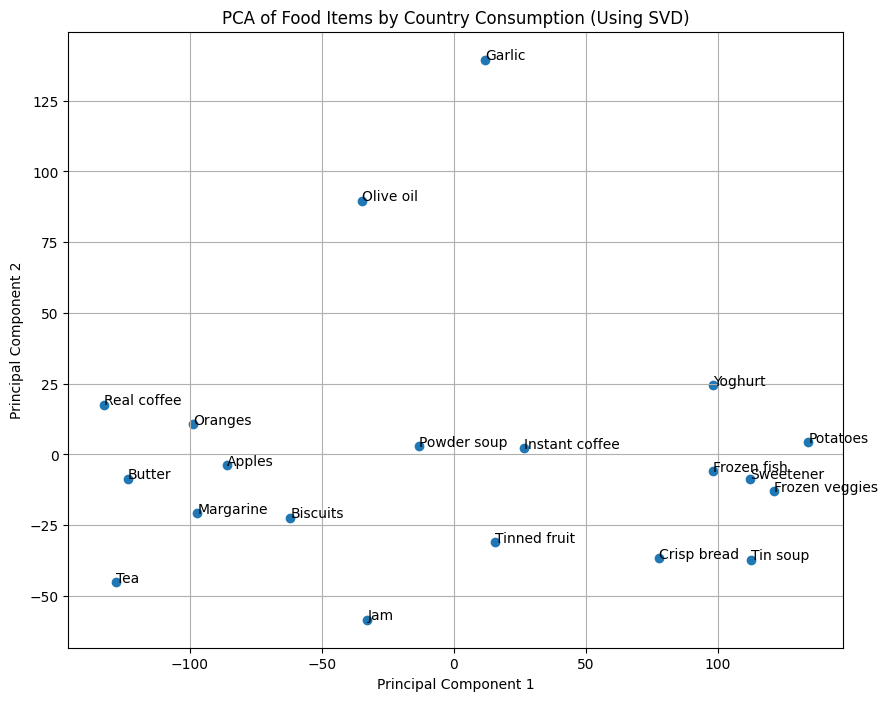

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(projected_df_T['PC1'], projected_df_T['PC2'])

# Annotate each food item
for food in projected_df_T.index:
    plt.text(projected_df_T.loc[food, 'PC1'], projected_df_T.loc[food, 'PC2'], food)

plt.title('PCA of Food Items by Country Consumption (Using SVD)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# 3

In [10]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial import distance_matrix
from scipy.sparse.csgraph import shortest_path
from sklearn.decomposition import PCA
from scipy.sparse.csgraph import connected_components


In [16]:
# read in the data
def load_data(file_path):
    mat_data = scipy.io.loadmat(file_path)
    
    # print(mat_data['images'])
    return mat_data['images']

data = load_data('./data/isomap.mat')
data = data.T
data # Matrix of M x K (m vectors of dimension K. Corresponds to 698 images of 64 x 64 or 4096 pixels each

array([[0.01617647, 0.01617647, 0.01617647, ..., 0.        , 0.        ,
        0.        ],
       [0.01617647, 0.01617647, 0.01617647, ..., 0.        , 0.        ,
        0.        ],
       [0.01617647, 0.01617647, 0.01617647, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01617647, 0.01617647, 0.01617647, ..., 0.        , 0.        ,
        0.        ],
       [0.01617647, 0.01617647, 0.01617647, ..., 0.        , 0.        ,
        0.        ],
       [0.01617647, 0.01617647, 0.01617647, ..., 0.        , 0.        ,
        0.        ]])

In [137]:
# create distance matrices using sci py and visualize
def dist_mat(data):
    dist_matrix = distance_matrix(data, data,p = 2)
    return dist_matrix

def plot_dist_matrix(dist_matrix, file_name = 'dist_matrix'):
    distances = dist_matrix[np.triu_indices_from(dist_matrix, k=1)]

    # Plot histogram of distances
    plt.hist(distances, bins=100)
    plt.title(f"Distribution of Pairwise Distances: {file_name}")
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    
    # save the image
    save_path = os.path.join('./outputs/',f'{file_name}.png')
    plt.savefig(save_path)
    plt.show()
    plt.close()
    # Compute percentiles to get a reasonable range for epsilon
    percentiles = np.percentile(distances, [80, 90, 95, 99])
    print(f"80th percentile: {percentiles[0]}")
    print(f"90th percentile: {percentiles[1]}")
    print(f"95th percentile: {percentiles[2]}")
    print(f"99th percentile: {percentiles[3]}")

In [ ]:
# create the distribution matrix
dist_matrix = dist_mat(data)

In [24]:
dist_matrix # diagonals are 0, M x M is 698 x 698 

array([[ 0.        , 18.83094952,  6.74323967, ..., 21.51126745,
        22.79289298, 18.03618033],
       [18.83094952,  0.        , 19.55307161, ..., 15.07435566,
        21.63387369, 20.97399746],
       [ 6.74323967, 19.55307161,  0.        , ..., 22.82140093,
        23.24040786, 18.68417978],
       ...,
       [21.51126745, 15.07435566, 22.82140093, ...,  0.        ,
        23.3365749 , 17.19515048],
       [22.79289298, 21.63387369, 23.24040786, ..., 23.3365749 ,
         0.        , 20.31353772],
       [18.03618033, 20.97399746, 18.68417978, ..., 17.19515048,
        20.31353772,  0.        ]])

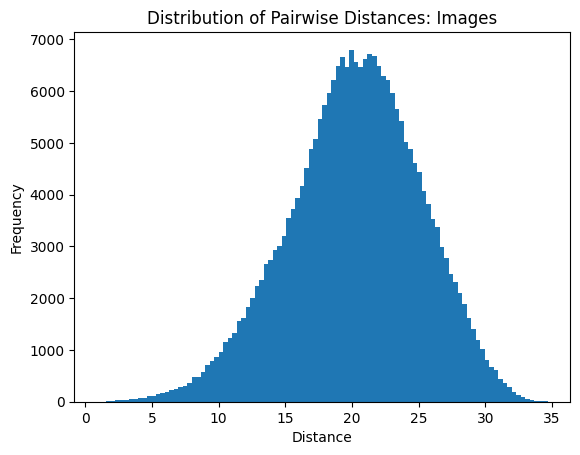

80th percentile: 24.44672439631069
90th percentile: 26.479607024537373
95th percentile: 28.035516407147572
99th percentile: 30.518508616975677


In [136]:
plot_dist_matrix(dist_matrix, 'Images')

In [37]:
# create the adjacency matrix, search for minimum epsilon for 1 connected component

def adj_matrix(dist_matrix, epsilon):
    adj_mat = np.where(dist_matrix < epsilon, dist_matrix, 0)
    
    return adj_mat

def epsilon_search(epsilon_list, dist_matrix):
    
    for epsilon in epsilon_list:
        adj_mat = adj_matrix(dist_matrix, epsilon)
        
        num_components, labels = connected_components(adj_mat)
        
        if num_components == 1:
            print(f"Graph becomes fully connected at epsilon = {epsilon}")
            return epsilon, adj_mat
        
    print("No fully connected graph found in the given epsilon range.")
    return None

In [38]:
# search for epsilon from 1 to 36
epsilon_list = list(range(1,36))
# epsilon_list

min_epsilon, min_adj_mat = epsilon_search(epsilon_list, dist_matrix)

min_epsilon

Graph becomes fully connected at epsilon = 11


11

In [109]:
# for images in the graph

def reshape_images(data):
    num_images = data.shape[0]  # 698 images
    reshaped_images = data.reshape(num_images, 64, 64, order = 'F')  # Reshape each row into 64x64 image
    return reshaped_images

reshaped_images = reshape_images(data)

In [110]:
print(f"Reshaped images shape: {reshaped_images.shape}")

Reshaped images shape: (698, 64, 64)


In [139]:
# visualize adjacency matrix via a graph
def visualize_adjacency_matrix(min_adj_mat, min_epsilon, file_name = 'Adjacency Matrix'):

    # Step 3: Visualize adjacency matrix as an image
    plt.figure(figsize=(10, 10))
    plt.imshow(min_adj_mat, cmap='gist_yarg', interpolation='nearest')
    plt.colorbar()
    plt.title(f'{file_name} (epsilon = {min_epsilon})')
    
    # save the image
    save_path = os.path.join('./outputs/',f'{file_name}.png')
    plt.savefig(save_path)
    plt.show()
    plt.close()
    
    return None



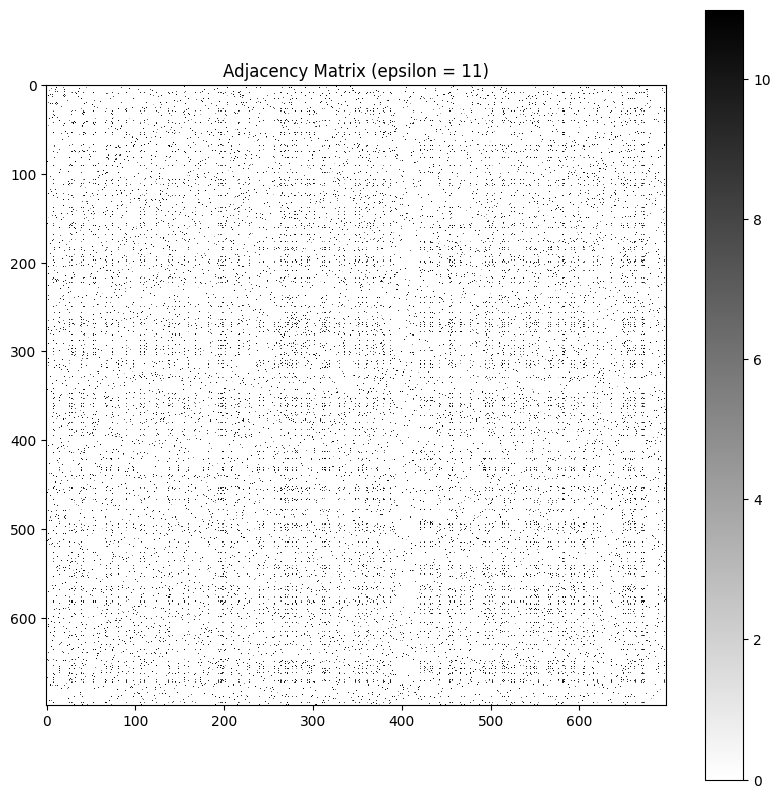

In [140]:
# visualize min adj_mat
visualize_adjacency_matrix(min_adj_mat, min_epsilon)

In [144]:

import random
from matplotlib.offsetbox import AnnotationBbox, OffsetImage


# optional
def add_image_to_graph(ax, img, pos, zoom=0.2):
    """Helper function to add an image at a specific position in the graph"""
    imgbox = OffsetImage(img, zoom=zoom, cmap='gray')
    ab = AnnotationBbox(imgbox, pos, frameon=False)
    ax.add_artist(ab)
    
def visualize_graph(min_adj_mat, data, reshaped_images, dist_matrix, num_images = 10, min_dist = 0.3, file_name = 'Graph'):
    # Step 4: Convert adjacency matrix into a graph
    G = nx.from_numpy_array(min_adj_mat)
    
    selected_nodes = []
    num_total_images = data.shape[0]

    while len(selected_nodes) < num_images:
        candidate = random.randint(0, num_total_images - 1)
        
        # Ensure the candidate is not too close to any already selected node
        if all(dist_matrix[candidate, selected] > min_dist for selected in selected_nodes):
            selected_nodes.append(candidate)
    
    # Step 4: Draw the graph
    pos = nx.spring_layout(G)  # Layout for visualizing graphs
    fig, ax = plt.subplots(figsize=(12, 10))
    nx.draw(G, pos, node_size=20, with_labels=False, node_color='blue', ax=ax)

    # Step 5: Add images at the selected nodes
    for i in selected_nodes:
        # Highlight the selected nodes in the graph
        nx.draw_networkx_nodes(G, pos, nodelist=[i], node_size=500, node_color='red', ax=ax)
        
        # Add the images to the graph near their corresponding nodes
        add_image_to_graph(ax, reshaped_images[i], pos[i], zoom=0.75)
        
    plt.title('Graph with Random Images Plotted Near Nodes')
    
    # save the image
    save_path = os.path.join('./outputs/',f'{file_name}.png')
    plt.savefig(save_path)
    plt.show()
    plt.close()


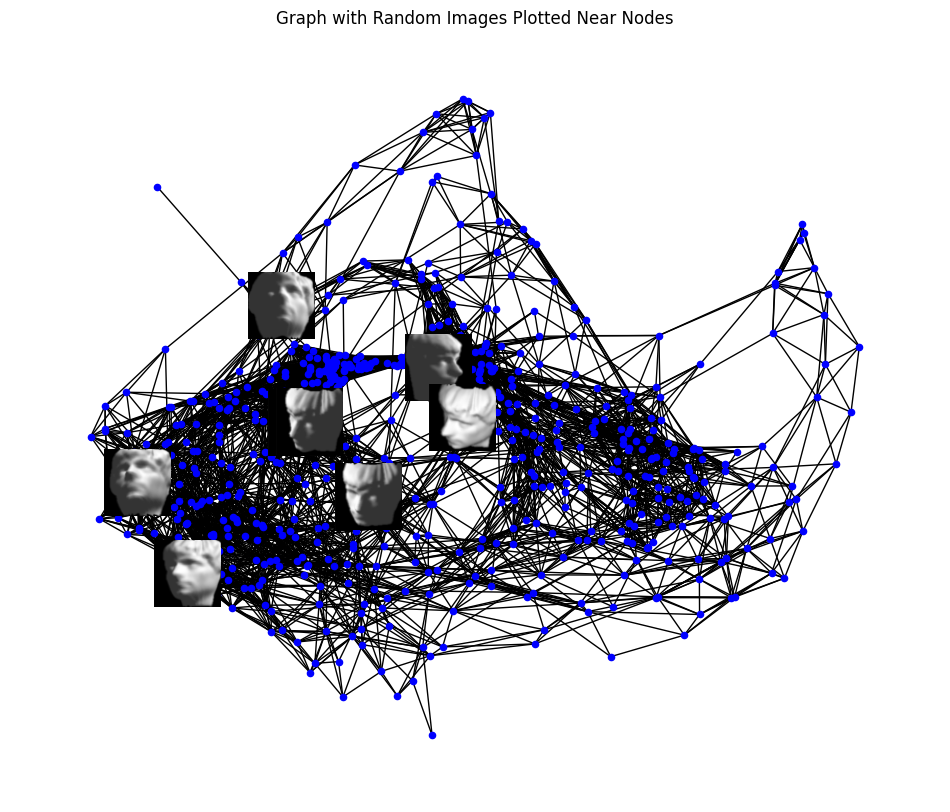

In [145]:
# visualize graph
visualize_graph(min_adj_mat, data, reshaped_images, dist_matrix, num_images=8, min_dist = 10)

In [97]:
# calculate the shortest distance graph D
def shortest_dist_matrix(min_adj_matrix):
    D = shortest_path(min_adj_mat, method='D', directed=False)
    
    return D

# Apply MDS method from lecture to center the squared distance matric
def apply_mds(D):
    n = D.shape[0]
    H = np.eye(n) - np.ones((n, n)) / n  
    D_squared = D ** 2
    C = -0.5 * H @ D_squared @ H
    
    return C

D = shortest_dist_matrix(min_adj_mat)
# D
C = apply_mds(D)
# C

In [88]:
# extract top specified eigenvalues and eigenvectors

def get_eig(C):
    eigenvalues, eigenvectors = np.linalg.eigh(C)
    return eigenvalues, eigenvectors
eigenvalues, eigenvectors = get_eig(C)
# eigenvalues
# eigenvectors

In [92]:
# generate the embedding using top k eigenvectors
def get_embeddings(eigenvalues, eigenvectors, k):
    idx = np.argsort(eigenvalues)[::-1]  
    top_eigenvectors = eigenvectors[:, idx[:k]]  
    top_eigenvalues = eigenvalues[idx[:k]]
    
    embedding = top_eigenvectors * np.sqrt(top_eigenvalues)
    
    return embedding


In [93]:
embedding = get_embeddings(eigenvalues, eigenvectors, 2)

In [122]:
embedding

array([[ 23.14029122,   0.65376876],
       [-24.43077693,  -4.06502545],
       [ 22.83576457,   8.08408578],
       ...,
       [-12.3947765 , -18.96981662],
       [-27.09435462,  10.62583276],
       [  9.8124648 ,  -5.15868727]])

In [146]:
# visualize the embedding
def add_image_to_plot(img, pos, zoom=0.2):
        imgbox = OffsetImage(img, zoom=zoom, cmap='gray')
        ab = AnnotationBbox(imgbox, pos, frameon=False)
        plt.gca().add_artist(ab)
        
        
def plot_embedding(embedding, images, num_images = 5, min_dist = 0.5, type = 1):
    # Step 1: Plot the 2D embedding
    plt.figure(figsize=(12, 10))
    plt.scatter(embedding[:, 0], embedding[:, 1], c='blue')
    plt.title('ISOMAP Embedding (2D)')
    
    # Select random indices ensuring they are not too close to each other
    num_total_images = embedding.shape[0]
    selected_indices = []
    
    
    while len(selected_indices) < num_images:
        candidate = random.randint(0, num_total_images - 1)
        # Ensure the candidate is not too close to any already selected index
        if all(np.linalg.norm(embedding[candidate] - embedding[selected]) > min_dist
               for selected in selected_indices):
            selected_indices.append(candidate)
    
    # Plot the images at the selected indices
    for i in selected_indices:
        # Add the image to the plot
        add_image_to_plot(reshaped_images[i], embedding[i], zoom=0.75)
        
        # Add a label
        plt.text(embedding[i, 0], embedding[i, 1], f'Face {i}', fontsize=12, color='red')
    
    if type == 1:
        plt.title('ISOMAP Embedding with Random Images')
        file_name = 'ISOMAP'
    else:
        plt.title('PCA Embedding with Random Images')
        file_name= 'PCA'
    
    # save the image
    save_path = os.path.join('./outputs/',f'{file_name}.png')
    plt.savefig(save_path)
    plt.show()
    plt.close()
    


In [117]:
# run pca w 2 components and compare

pca = PCA(n_components=2)
embedding_pca = pca.fit_transform(data)

# embedding_pca

In [123]:
embedding_pca

array([[  4.32787265,  -2.40800741],
       [ -3.3946927 ,  -2.29744317],
       [  6.27976086,  -2.19350851],
       ...,
       [-13.04929619,  -3.09540953],
       [ -2.02335236,  13.28800806],
       [ -7.25452932,   2.98533352]])

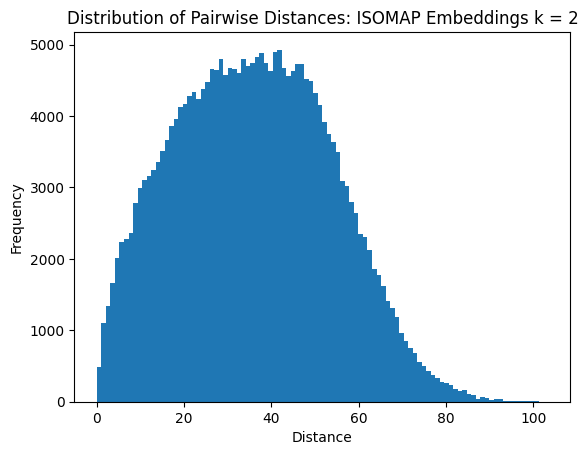

80th percentile: 51.92862450893836
90th percentile: 59.50305284423894
95th percentile: 65.51947131586155
99th percentile: 76.71779818265357


In [147]:
dist_embedding = dist_mat(embedding)  # diagonals are 0, M x M is 698 x 698 
plot_dist_matrix(dist_embedding, file_name = 'ISOMAP Embeddings k = 2')

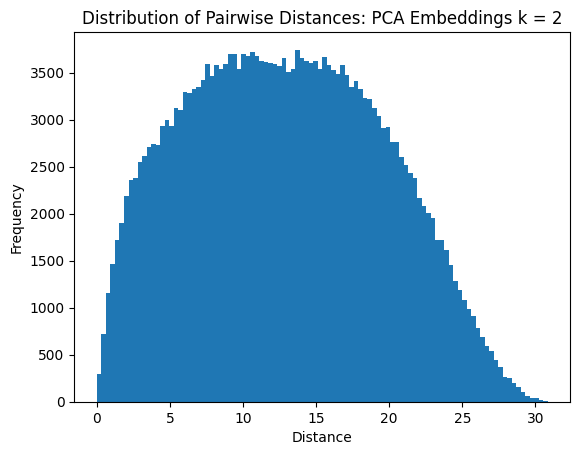

80th percentile: 19.173481602730405
90th percentile: 21.969694735409437
95th percentile: 23.925403233294276
99th percentile: 26.8683232915864


In [148]:
dist_embedding_pca = dist_mat(embedding_pca)  # diagonals are 0, M x M is 698 x 698 
plot_dist_matrix(dist_embedding_pca, file_name = 'PCA Embeddings k = 2')

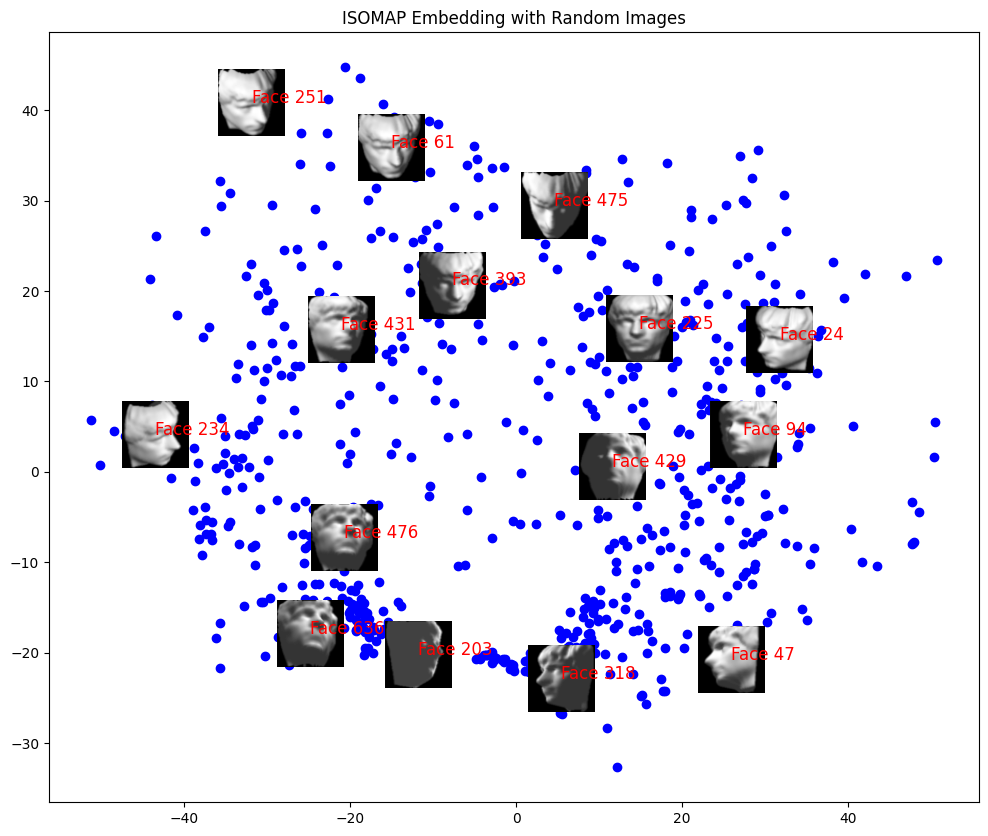

In [149]:
# run function w. 2 components and visualize the isomap
plot_embedding(embedding, reshaped_images, num_images = 15, min_dist = 10)

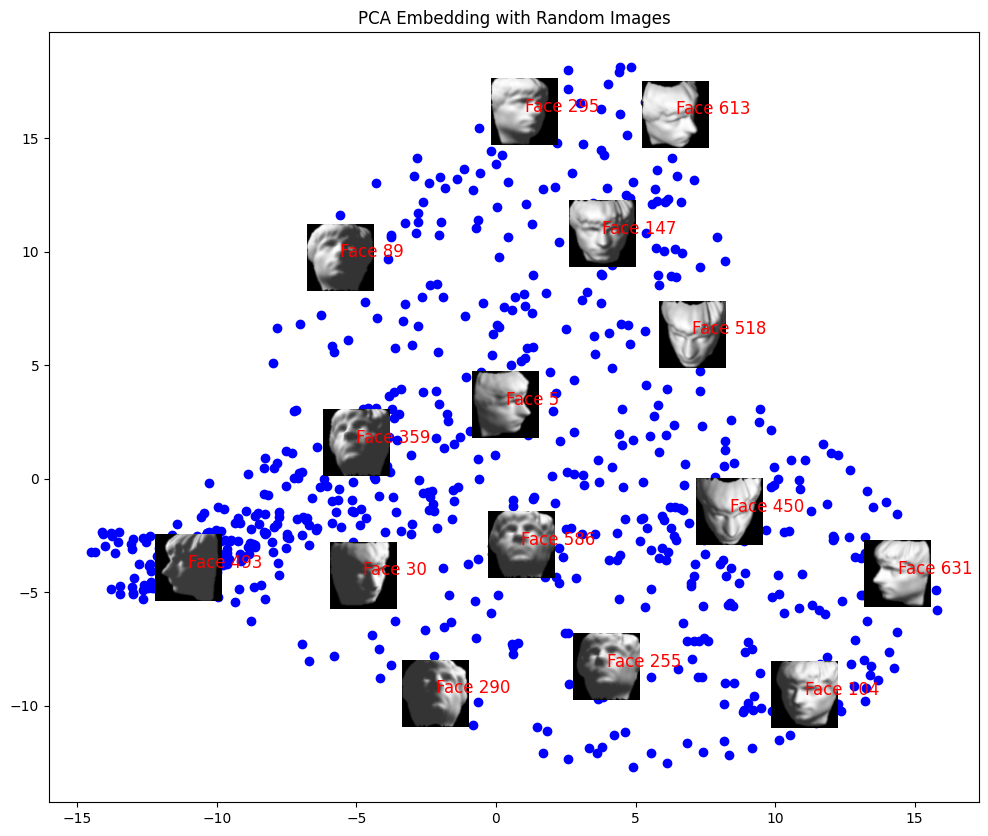

In [150]:
# plot pca

# run function w. 2 components and visualize the isomap
plot_embedding(embedding_pca, reshaped_images, num_images=15, min_dist=5, type = 2)

# 4 Eigenfaces and Simple Face Recognition

In [153]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.decomposition import PCA
# import cv2

In [151]:
# read in the pictures, downsize and vectorize them

def read_images(subject, factor = 4):
    images = []
    image_dir = './data/yalefaces/'
    
    for filename in os.listdir(image_dir):
        if subject in filename:
            img = Image.open(os.path.join(image_dir, filename)).convert('L')  # Convert to grayscale
            w, h = img.size
            img_resized = img.resize((w // factor, h // factor), Image.Resampling.LANCZOS)

            img_shape = img_resized.size[::-1]  

            images.append(np.array(img_resized).flatten())
            # print(f"Processed image: {filename}, shape: {img_resized.size}, vectorized length: {len(images[-1])}")
    
    images = np.array(images)        
    return images, img_shape
# function to perform pca to get (top 6) eigenfaces
def perform_pca(images, img_shape, subject, n_components = 6):
    # center images for pca
    mean_image_vector = np.mean(images, axis=0)
    centered_images = images - mean_image_vector
    
    pca = PCA(n_components=n_components)
    pca.fit(centered_images)
    eigenfaces = pca.components_ 
    
    # Plot the top 6 eigenfaces
    fig, axes = plt.subplots(2, 3, figsize=(10, 7))
    for i, ax in enumerate(axes.flat):
        ax.imshow(eigenfaces[i].reshape(img_shape), cmap='gray', aspect='auto', interpolation='nearest')
        ax.set_title(f'Eigenface {i+1}')
        ax.axis('off')
    plt.suptitle(f'Top 6 Eigenfaces for {subject}')
    
    # save the image
    save_path = os.path.join('./outputs/',f'Top 6 Eigenfaces for {subject}.png')
    plt.savefig(save_path)
    plt.show()
    plt.close()
    
    return pca, eigenfaces[0], mean_image_vector

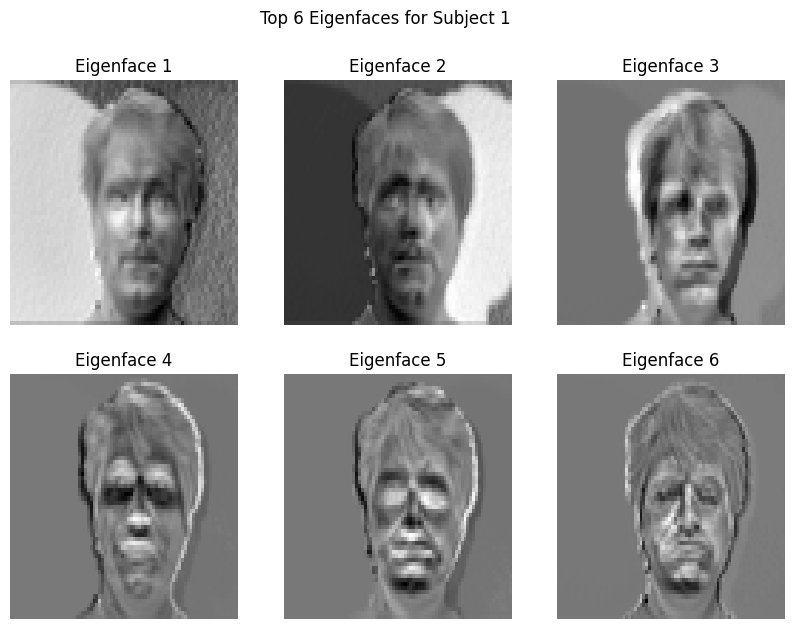

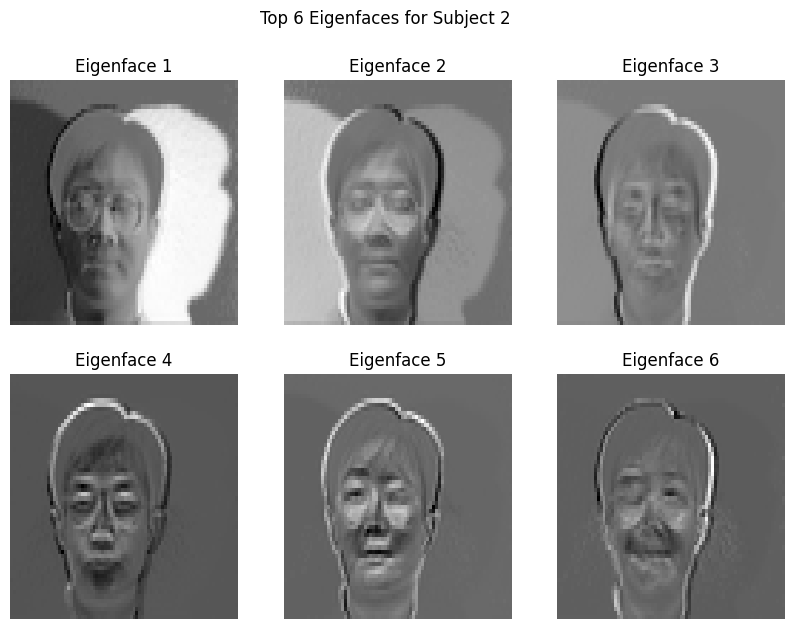

In [154]:
# Load and preprocess images for Subject 1 and Subject 2 (excluding test images)
subject1_images, img_shape1 = read_images('subject01.')
subject2_images, img_shape2 = read_images('subject02.')

# Perform PCA for both subjects
pca_subject1, top_eigenface_subject1, mean_image_subject1 = perform_pca(subject1_images, img_shape1, 'Subject 1')
pca_subject2, top_eigenface_subject2, mean_image_subject2 = perform_pca(subject2_images, img_shape2, 'Subject 2')


In [155]:
# residual formula
def calculate_residual(test_image_vector, eigenface, mean_image_vector):
    
    # make sure eigenface and test_image_vector are compatible to be multiplied
    test_image_vector = np.ravel(test_image_vector)
    
    # center
    centered_test_image = test_image_vector - mean_image_vector
    
    projection = np.dot(eigenface, centered_test_image)
    
    reconstructed_centered_image = np.dot(eigenface.T, projection)
    
    reconstructed_image = reconstructed_centered_image + mean_image_vector
    
    residual = np.linalg.norm(test_image_vector - reconstructed_image)**2
    
    return residual

In [156]:
# test images
subject1_test, test1_shape = read_images('subject01-')
subject2_test, test2_shape = read_images('subject02-')


residual1_subject1 = calculate_residual(subject1_test, top_eigenface_subject1, mean_image_subject1)
residual1_subject2 = calculate_residual(subject1_test, top_eigenface_subject2, mean_image_subject2)
residual2_subject1 = calculate_residual(subject2_test, top_eigenface_subject1, mean_image_subject1)
residual2_subject2 = calculate_residual(subject2_test, top_eigenface_subject2, mean_image_subject2)

# Report the residuals
print(f"Residual for test image 1 with Subject 1 top eigenface: {residual1_subject1}")
print(f"Residual for test image 1 with Subject 2 top eigenface: {residual1_subject2}")
print(f"Residual for test image 2 with Subject 1 top eigenface: {residual2_subject1}")
print(f"Residual for test image 2 with Subject 2 top eigenface: {residual2_subject2}")

Residual for test image 1 with Subject 1 top eigenface: 6742872.447302868
Residual for test image 1 with Subject 2 top eigenface: 32746524.602069814
Residual for test image 2 with Subject 1 top eigenface: 39491807.83048872
Residual for test image 2 with Subject 2 top eigenface: 3735545.108268837


In [166]:
# visualize
# Group the variables and their names
variables = ['Test1Subject2', 'Test1Subject1', 'Test2Subject1', 'Test2Subject2']
values = np.round([residual1_subject2, residual1_subject1,  residual2_subject1, residual2_subject2],0).astype(int)

# Define colors: First two will be blue, the next two will be green
colors = ['orange', 'blue', 'orange', 'blue']

# Create the bar chart
def plot_residuals(variables, values, colors):
    plt.figure(figsize=(8, 6))
    bars = plt.bar(variables, values, color=colors)
    
    # Add the values on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')
    
    # Add title and labels
    plt.title('Projection Residual of Eigenfaces')
    
    # Slant the x-axis labels to fit
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.tight_layout()
    
    # save the image
    save_path = os.path.join('./outputs/',f'Eigenfaces_Projection_Residuals.png')
    plt.savefig(save_path)
    plt.show()
    plt.close()

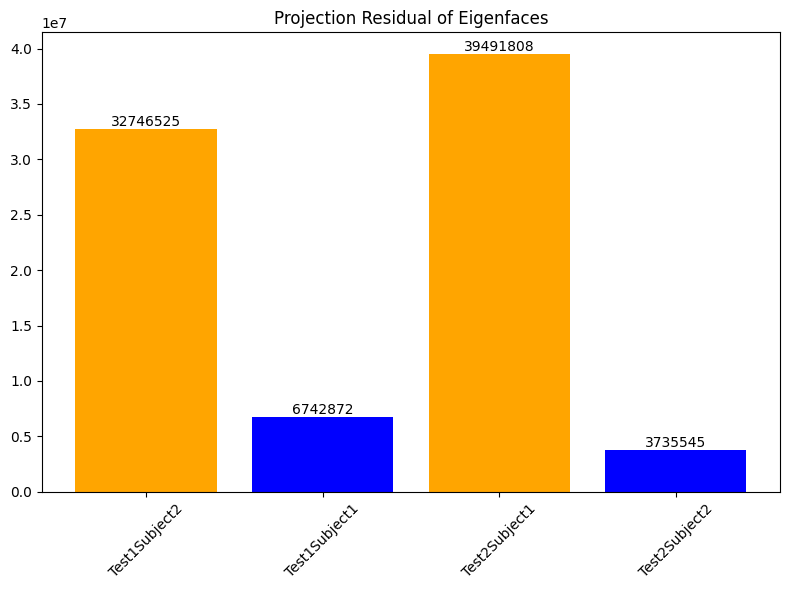

In [167]:
plot_residuals(variables, values, colors)